In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../results/results.csv")

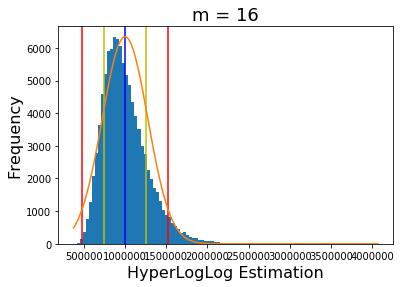

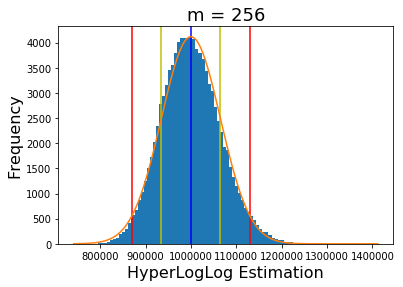

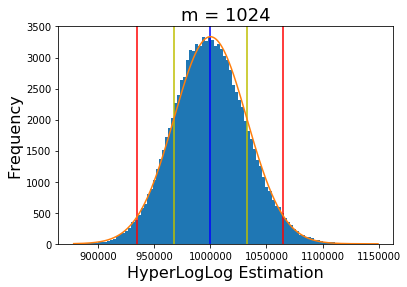

In [3]:
n = 1000000
ms = [16,256,1024] 
for m in ms:    
    d = df[df["m"] == m]
    h = plt.hist(d["Estimation"],bins = 100)
    
    plt.xlabel("HyperLogLog Estimation",size = 16)
    plt.ylabel("Frequency",size = 16)
    
    sigma = 1.04/np.sqrt(m)
    plt.title(f"m = {m}",size = 18)
    

     
    # normal_distribution = (np.exp(-((x-1000000)^2)/(2*sigma^2)))/(np.sqrt(2*(np.pi)*(sigma^2)))
    a = min(d["Estimation"])
    b = max(d["Estimation"])
    std = np.std(d["Estimation"])
    scale = max(h[0])
    nu = np.mean(d["Estimation"])
    x = np.linspace(a,b,1000)
    y = scale*(np.exp(-((x-1000000)**2)/(2*std**2)))
    
    plt.axvline(x=1000000, c = "b")
    plt.axvline(x=n*(1+sigma), c = "y")
    plt.axvline(x=n*(1-sigma), c = "y")
    plt.axvline(x=n*(1+2*sigma), c = "r")
    plt.axvline(x=n*(1-2*sigma), c = "r")
    plt.plot(x,y)
    plt.savefig(f"data/ex4{m}.png")
    plt.show()

    
    
#     def gauss(x):
#         return (np.exp(-((x-1000000)^2)/(2*sigma^2)))/(np.sqrt(2*(np.pi)*(sigma^2)))

# def graph(formula, x_range):  
#     x = np.array(x_range)  
#     y = formula(x)  # <- note now we're calling the function 'formula' with x
#     plt.plot(x, y)  
#     plt.show()  

# def my_formula(x):
#     return (np.exp(-((x-1000000)^2)/(2*sigma^2)))/(np.sqrt(2*(np.pi)*(sigma^2)))

# graph(my_formula, range(-10, 11))
#y

In [33]:
## Calculate fractions 

for m in ms:
    d = df[df["m"] == m]
    sigma = 1.04/np.sqrt(m)
    extimations = d["Estimation"].values

    count_sigma1 = 0
    count_sigma2 = 0
    for i in range(len(extimations)):
        if (n*(1-sigma) < extimations[i]) and (n*(1+sigma) > extimations[i]):
            count_sigma1 += 1
        if (n*(1-2*sigma) < extimations[i]) and (n*(1+2*sigma) > extimations[i]):
            count_sigma2 += 1
    
    print("m",m)
    print("Fraction 1 sigma",count_sigma1/len(extimations))
    print("Fraction 2 sigma",count_sigma2/len(extimations))

m 16
Fraction 1 sigma 0.69453
Fraction 2 sigma 0.95042
m 256
Fraction 1 sigma 0.68596
Fraction 2 sigma 0.95476
m 1024
Fraction 1 sigma 0.68521
Fraction 2 sigma 0.95523


100000

False

740000.0